# Import libraries

In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

# face detection

In [2]:
def detect_face(input_img):
    image = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier('opencv_xml_files/haarcascade_frontalface.xml')
    faces = face_cascade.detectMultiScale(image, scaleFactor=1.2, minNeighbors=5);
    if (len(faces) == 0):
        return -1, -1
    (x, y, w, h) = faces[0]
    return image[y:y+w, x:x+h], faces[0]

# prepare training dataset

In [3]:
def prepare_training_data(data_path):
    detected_faces = []
    face_labels = []
    traning_image_dirs = os.listdir(data_path)
    for dir_name in traning_image_dirs:
        label = int(dir_name)
        training_image_path = data_path + "/" + dir_name
        training_images_names = os.listdir(training_image_path)
        
        for image_name in training_images_names:
            image_path = training_image_path  + "/" + image_name
            image = cv2.imread(image_path)
            face, rect = detect_face(image)
            if face is not -1:
                resized_face = cv2.resize(face, (121,121), interpolation = cv2.INTER_AREA)
                detected_faces.append(resized_face)
                face_labels.append(label)

    return detected_faces, face_labels

In [4]:
faces, labels = prepare_training_data("dataset/training-data")

In [5]:
print("Total faces: ", len(faces))
print("Total labels: ", len(labels))

Total faces:  95
Total labels:  95


# initialize a face recognizer

In [6]:
face_recognizer = cv2.face.EigenFaceRecognizer_create()

# train the face recognizer model

In [7]:
face_recognizer.train(faces, np.array(labels))

In [8]:
def draw_rectangle(img, rect):
    (x, y, w, h) = rect
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

def draw_text(img, text, x, y):
    cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 0), 2)

# predict output on test data

In [9]:
def predict(test_image):
    face, rect = detect_face(test_image)
    resized_face = cv2.resize(face, (121,121), interpolation = cv2.INTER_AREA)
    label= face_recognizer.predict(resized_face)
    label_text = tag[label[0]]
    draw_rectangle(test_image, rect)
    draw_text(test_image, label_text, rect[0], rect[1]-5)
    return test_image, label_text

In [10]:
tag = ['0', '1', '2', '3', '4']

In [11]:
test_image = cv2.imread("dataset/test-data/1/Alvaro_Uribe_0021.jpg")

In [12]:
predicted_image, label = predict(test_image)

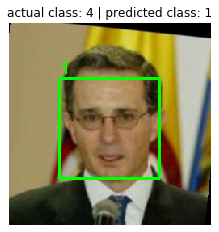

In [13]:
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title('actual class: ' + tag[4]+ ' | ' + 'predicted class: ' + label)
plt.axis("off")
imgplot = plt.imshow(cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB))
plt.show()